# LetsGrowMore (LGMVIP) - May 2022

## A.GOWTHAMI - Data Science Intern

## ADVANCED LEVEL TASK

## Task 6 - Develop a neural network that can read Handwriting

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST 

DATASET LINK : https://en.wikipedia.org/wiki/MNIST_database

### 1. IMPORTING THE NECESSORY LIBRARIES

In [3]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import numpy as np

### 2. LOADING THE DATASET

In [4]:
(x_train,y_train), (x_test,y_test) = load_data()

### 3. RESHAPING THE TRAINING AND TESTING DATA

In [5]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

### 4. NORMALIZING THE VALUES OF PIXELS OF IMAGES

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### 5. PLOTTING THE IMAGES THAT IS PRESENT IN THE DATASET

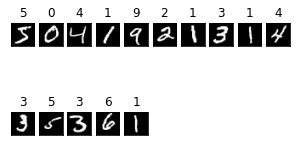

In [7]:
fig = plt.figure(figsize = (5,3))
for i in range(15):
    ax = fig.add_subplot(2,10, i+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(x_train[i]), cmap = 'gray')
    ax.set_title(y_train[i])

### 6. DETERMINING THE SHAPE OF THE IMAGE

In [8]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


### 7. DEFINING THE MODEL

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

In [20]:
plot_model(model, 'model.jpg',show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
x = model.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose = 2, validation_split = 0.1)

Epoch 1/10
422/422 - 20s - loss: 0.0233 - accuracy: 0.9917 - val_loss: 0.0296 - val_accuracy: 0.9915 - 20s/epoch - 47ms/step
Epoch 2/10
422/422 - 20s - loss: 0.0201 - accuracy: 0.9930 - val_loss: 0.0258 - val_accuracy: 0.9930 - 20s/epoch - 49ms/step
Epoch 3/10
422/422 - 21s - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0254 - val_accuracy: 0.9935 - 21s/epoch - 49ms/step
Epoch 4/10
422/422 - 19s - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0250 - val_accuracy: 0.9932 - 19s/epoch - 44ms/step
Epoch 5/10
422/422 - 19s - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.0264 - val_accuracy: 0.9945 - 19s/epoch - 45ms/step
Epoch 6/10
422/422 - 20s - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0295 - val_accuracy: 0.9925 - 20s/epoch - 48ms/step
Epoch 7/10
422/422 - 20s - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.0253 - val_accuracy: 0.9930 - 20s/epoch - 48ms/step
Epoch 8/10
422/422 - 20s - loss: 0.0120 - accuracy: 0.9958 - val_loss: 0.0277 - val_accuracy: 0.9922 - 20s/epoch - 46ms/step


In [23]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Accuarcy: {accuracy*100}')

Accuarcy: 99.32000041007996


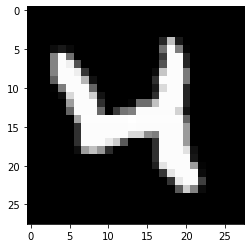

In [28]:
image = x_train[20]
# displaying the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [29]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print('Predicted : {}'.format(argmax(p)))

Predicted : 4
